In [0]:
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
# !wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
# !dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
# !apt-get install -f
# !apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
# Create a directory and mount Google Drive onto the colab workspace using that directory.

!mkdir -p drive

!google-drive-ocamlfuse drive
!pip install tables
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools


The above portion is to mount **Google Drive** onto **Google Colab**


In [4]:
!ls ./drive/Colab\ Notebooks/

 amazon			  mobileNet.ipynb
 AmazonFood.ipynb	  NaiveBayes.ipynb
 BloodCell.ipynb	  new.ipynb
 blood-cells		  nuclei
 BoundingBoxes_info.csv   nuclei.ipynb
'Cancer Diag.ipynb'	  PCA.ipynb
 cartisan.ipynb		  PersonalizedCancerDiagnosis.ipynb
 Celeb.ipynb		 'Problem Statement.pdf'
 celebs.ipynb		  Project.ipynb
 DL_info.csv		  pydrive.ipynb
 drive			  pytorch_imp.ipynb
 Final			  social
 keras_mnist.ipynb	  social_influence.ipynb
 kfold.ipynb		  Template.ipynb
 knn.ipynb		  Test_Celeb_Data.csv
 KNN.ipynb		  Untitled
 Mask_RCNN		  Untitled3.ipynb
 MLP.ipynb		  xceptionNet.ipynb
 mnist.csv


In [0]:
import pandas as pd
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from glob import glob

In [14]:
!ls ./drive/Colab\ Notebooks/Final/data/

BoundingBoxes_info.csv	Test_Data_Indexes.csv  weights_best.hdf5
DriveUploader		train
Test_Celeb_Images	Train_Data.csv


In [15]:
# Read the .csv file containing training data
train_df = pd.read_csv("./drive/Colab Notebooks/Final/data/Train_Data.csv",index_col = False)   # Read the .csv file containing training data
train_df.head(3)

,Unnamed: 0,image_id,Arched_Eyebrows,Bags_Under_Eyes,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Bushy_Eyebrows,...,Wearing_Earrings,Wearing_Lipstick,MF_1,MF_2,MF_3,MF_4,MF_5,MF_6,MF_7,MF_8
0,0,069568.jpg,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,117493.jpg,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,2,096568.jpg,1,0,1,0,0,1,0,0,...,1,1,1,1,0,0,0,1,1,0


In [16]:
# Dropping the unnecessary column
train_df = train_df.drop(columns = ["Unnamed: 0"])     
train_df.head(3)

,image_id,Arched_Eyebrows,Bags_Under_Eyes,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Bushy_Eyebrows,Male,...,Wearing_Earrings,Wearing_Lipstick,MF_1,MF_2,MF_3,MF_4,MF_5,MF_6,MF_7,MF_8
0,069568.jpg,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,117493.jpg,0,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,1,0,0,0
2,096568.jpg,1,0,1,0,0,1,0,0,0,...,1,1,1,1,0,0,0,1,1,0


In [17]:
# Read the .csv file containing Bounding Boxes data of all both train and test
bb = pd.read_csv("./drive/Colab Notebooks/Final/data/BoundingBoxes_info.csv")
bb.head(3)

,Unnamed: 0,x_1,y_1,width,height
0,069568.jpg,545,141,309,428
1,117493.jpg,103,2,203,281
2,096568.jpg,134,84,195,270


In [18]:
#Changing the column names of Bounding BOxes
bb.columns = ['id','x','y','width','height']
bb.head(2)

,id,x,y,width,height
0,069568.jpg,545,141,309,428
1,117493.jpg,103,2,203,281


In [19]:
# Reading all the image file paths 
%%time
imgs = glob(os.path.join('./drive','Train_Celeb_Images','*.jpg'))

CPU times: user 72.1 ms, sys: 17.3 ms, total: 89.4 ms
Wall time: 4min 8s


In [20]:
# Total training images 
len(imgs)

21080

Train images folder has around 59000 files  and failed many times while trying to upload the entire folder and other ways of obtaining all the data

So at maximum I was able to extract 21000 images from the entire because of time and resource constraints

and so used them for training

In [21]:
imgs[15]

'./drive/Train_Celeb_Images/073067.jpg'

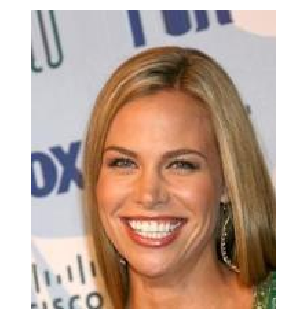

In [22]:
# Plotting a sample image

img15 = cv2.imread(imgs[1])

plt.axis('off')
plt.imshow(cv2.cvtColor(img15, cv2.COLOR_BGR2RGB))

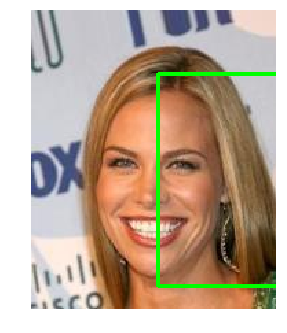

In [23]:
# Plotting the bounding boxes for sample image

x,y,w,h = 92,46,112,155     # these values are taken from bounding box file manully

plt.axis('off')
img15 = cv2.cvtColor(img15, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.rectangle(img15,(x,y),(x+w,y+h),(0,255,0),2))

These Bounding values aren't making any sense so they were ignored

In [0]:
# Coverting numpy array of image locations into array of image files
img_lst = []
for i in imgs:
  img_lst.append(i.split("/")[-1])

In [25]:
img_lst[4]

'073042.jpg'

In [0]:
# Checking all the image files that are being used here
# are in dataFrame
mask = train_df.image_id.apply(lambda x : True if x in img_lst  else False)

In [27]:

mask.value_counts()

False    37004
True     21080
Name: image_id, dtype: int64

In [0]:
# copying the data of only those image id's that we are going 
#  to use from the dataframe
df = train_df[mask]

In [32]:
df.shape

(21080, 23)

In [33]:
#  Creating a model using Keras
import keras
from keras.models import Sequential
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Flatten

# Considered InceptionV3 because of the low number of parameters 
base_model = InceptionV3(include_top = False, weights=None, input_shape = (128,128,3) )

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
# model.add(Dense(512,activation = 'relu'))

# Sigmoid activation is used because the problem is multi-label classification with binary values
model.add(Dense(22,activation = 'sigmoid'))

# Because of binary multi labels, binary crossentropy loss is considered
model.compile(loss= keras.losses.binary_crossentropy,
             optimizer = keras.optimizers.Adam(0.001),
             metrics = ['accuracy'])

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 22)                5654      
Total params: 23,905,846
Trainable params: 23,871,414
Non-trainable params: 34,432
_________________________________________________________________


In [0]:
# Grabbed this part code from Github repo
# This is custom designed Data Generator by extending Sequence of Keras.utils

from keras.utils import Sequence
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from skimage.transform import resize

class ImageGen(Sequence):
    
    def __init__(self, imgs, y, target_size=(224, 224), save_format='jpg',
                 batch_size=32, shuffle=True,preprocess_fn=None, seed=None,
                 dtype='float32', save_prefix='', save_to_dir=False):
        
        self.imgs = np.array(imgs)
        self.y = np.array(y)
        self.batch_size = batch_size
        self.target_size = target_size
        self.image_shape = target_size + (3,)
        self.shuffle = shuffle
        self.preprocess_fn = preprocess_fn
        self.seed = seed
        self.dtype = dtype
        self.total_batches_seen = 0
        self.save_to_dir = save_to_dir
        self.save_prefix = save_prefix
        self.save_format = save_format
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.ceil(len(self.imgs) / float(self.batch_size)))
    
    def on_epoch_end(self):
        self.total_batches_seen += 1
        self.indexes = np.arange(len(self.imgs))
        if self.shuffle:
            if self.seed is not None:
                np.random.seed(self.seed + self.total_batches_seen)
            np.random.shuffle(self.indexes)
    


    def __getitem__(self, batch_index):
        index_array = self.indexes[batch_index*self.batch_size:(batch_index + 1)*self.batch_size]
        batch_x = np.zeros(
            (len(index_array),) + self.image_shape,
            dtype=self.dtype)
        # build batch of image data
        for i, index in enumerate(index_array):
            img_path = self.imgs[index]
            img = load_img(img_path, target_size=self.target_size)
            img = img_to_array(img.convert('RGB'))
            batch_x[i] = self.preprocess_fn(img)

#         batch_x = self.aug.augment_images(batch_x)

        if self.save_to_dir:
            img_paths = self.imgs[index_array]
            for i in range(len(batch_x)):
                img = array_to_img(batch_x[i],scale=True)
                fname = '{prefix}_{index}_{filename}.{format}'.format(prefix=self.save_prefix,
                                                                    index=batch_index + i,
                                                                    filename=os.path.basename(img_paths[i]),
                                                                    format=self.save_format)
                print(fname)
                img.save(os.path.join(self.save_to_dir, fname))

        # build batch of labels
        batch_y = self.y[index_array]
        return batch_x, batch_y


In [0]:
# Function to normalize the image 
# this function is used by the data generator class
def prepro(img):
  img = img/255.0
  return img

In [36]:
# Creating a new column and assigning it the image paths
# using image_id as key value

df["abs_name" ] = df.image_id.apply(lambda x: "./drive/Train_Celeb_Images/" + x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
# checking the dataframe whether new column is added
df.head(2)

,image_id,Arched_Eyebrows,Bags_Under_Eyes,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Bushy_Eyebrows,Male,...,Wearing_Lipstick,MF_1,MF_2,MF_3,MF_4,MF_5,MF_6,MF_7,MF_8,abs_name
0,069568.jpg,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,./drive/Train_Celeb_Images/069568.jpg
5,036097.jpg,0,1,1,0,0,0,0,0,0,...,1,1,0,0,1,0,1,1,1,./drive/Train_Celeb_Images/036097.jpg


In [0]:
# all the different columns which are considered as classes are stored into a list

labels = ['Arched_Eyebrows', 'Bags_Under_Eyes', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Bushy_Eyebrows', 'Male', 'No_Beard',
       'Oval_Face', 'Straight_Hair', 'Wearing_Earrings', 'Wearing_Lipstick',
       'MF_1', 'MF_2', 'MF_3', 'MF_4', 'MF_5', 'MF_6', 'MF_7', 'MF_8']

In [0]:
# Splitting the finalized data frame of 21080 values into Train 
# and Validation 

tr_df = df.head(2080)
val_df = df.tail(1000)

In [0]:
# Creating data generators for train and validation

train_gen = ImageGen(tr_df.abs_name, tr_df[labels], target_size=(128,128), preprocess_fn=prepro)
valid_gen = ImageGen(val_df.abs_name, val_df[labels], target_size=(128,128), preprocess_fn=prepro)

In [41]:
# this cell is run to make sure the generator is iterable 

next(iter(train_gen))

(array([[[[0.01568628, 0.03137255, 0.02745098],
          [0.01568628, 0.03137255, 0.02745098],
          [0.01176471, 0.02745098, 0.02352941],
          ...,
          [0.        , 0.01568628, 0.01176471],
          [0.        , 0.01568628, 0.01176471],
          [0.00392157, 0.01960784, 0.01568628]],
 
         [[0.01568628, 0.03137255, 0.02745098],
          [0.01568628, 0.03137255, 0.02745098],
          [0.01176471, 0.02745098, 0.02352941],
          ...,
          [0.        , 0.01568628, 0.01176471],
          [0.        , 0.01568628, 0.01176471],
          [0.00392157, 0.01960784, 0.01568628]],
 
         [[0.01568628, 0.03137255, 0.02745098],
          [0.01568628, 0.03137255, 0.02745098],
          [0.01176471, 0.02745098, 0.02352941],
          ...,
          [0.        , 0.01568628, 0.01176471],
          [0.        , 0.01568628, 0.01176471],
          [0.        , 0.01568628, 0.01176471]],
 
         ...,
 
         [[0.79607844, 0.56078434, 0.41960785],
          [0.80392

In [0]:

next(iter(valid_gen))

In [0]:
# Checkpointing is setup to save the network weights 
# The model weights are written to the file “weights.best_v1.hdf5”

from keras.callbacks import ModelCheckpoint

filepath = "./drive/Colab Notebooks/final/data/weights_best_v1.hdf5"
chkpnt = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [chkpnt]



In [47]:
# Fitting the model with train and validation generators
# steps per epoch is actually 659 but considered 250 due to time constraints
# Also epochs

history = model.fit_generator(train_gen, epochs = 15, steps_per_epoch=250, callbacks = callbacks_list, validation_data = valid_gen, validation_steps=32 )

Epoch 1/15
250/250 [==============================] - 1496s 6s/step - loss: 0.6183 - acc: 0.7262 - val_loss: 0.5709 - val_acc: 0.7282

Epoch 00001: val_acc improved from -inf to 0.72823, saving model to ./drive/Colab Notebooks/final/data/weights_best_v1.hdf5
Epoch 2/15
250/250 [==============================] - 3077s 12s/step - loss: 0.5135 - acc: 0.7586 - val_loss: 0.5442 - val_acc: 0.7415

Epoch 00002: val_acc improved from 0.72823 to 0.74145, saving model to ./drive/Colab Notebooks/final/data/weights_best_v1.hdf5
Epoch 3/15
250/250 [==============================] - 261s 1s/step - loss: 0.4658 - acc: 0.7805 - val_loss: 0.6260 - val_acc: 0.7348

Epoch 00003: val_acc did not improve from 0.74145
Epoch 4/15
250/250 [==============================] - 100s 400ms/step - loss: 0.4799 - acc: 0.7740 - val_loss: 0.6583 - val_acc: 0.7224

Epoch 00004: val_acc did not improve from 0.74145
Epoch 5/15
250/250 [==============================] - 99s 396ms/step - loss: 0.4679 - acc: 0.7804 - val_los

In [48]:
print(history.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


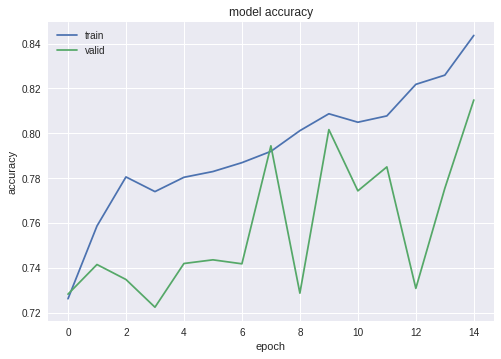

In [50]:
# Summarizing  history for accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()